# Lecture 10 - Spring 2024

Data Science, Spring 2024

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D

In [32]:
# Big font helper
def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [33]:
df=pd.read_csv(r'C:\Users\Muhammad_Talha\Downloads\COHORT 7\Week 1 + 2 + 3\Machine Learning\SLR_house_prices.csv')
df

,area,price
0,1360.0,75561.009869
1,4272.0,197449.640308
2,3592.0,180621.795096
3,966.0,45234.416477
4,4926.0,232342.452693
...,...,...
995,3261.0,164587.880099
996,3179.0,156818.403658
997,2606.0,135836.079275
998,4723.0,234621.268790


In [34]:
area_mean=df['area'].mean()
price_mean=df['price'].mean()

In [35]:
#method 1 to fill null values
df['area']=np.where(df['area'].isnull(), area_mean, df['area'])

#method 2 to fill null values (this one prefered)
df['price']=df['price'].fillna(price_mean)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    1000 non-null   float64
 1   price   1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


# 1st Task

We will first define some helper functions to calculate the regression line for us. Apply these helper funtions on house price dataset and compare with your previous model (you built using sklearn built-in funtions).

In [36]:
# Helper functions
# define standard unit function
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

# define correlation function
def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

# define slope function
def slope(x, y):
    r = correlation(x, y)
    return r * np.std(y) / np.std(x)

# define intercept function
def intercept(x, y):
    return np.mean(y) - slope(x, y) * np.mean(x)

# define fit_least_squares function
def fit_least_squares(x, y):
    theta_1 = slope(x, y)
    theta_0 = intercept(x, y)
    return theta_0, theta_1


# define predict function
def predict(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

# define mse function
def compute_mse(y, yhat):
    return np.mean((y - yhat) ** 2)



# 2nd Task
Let's look at four different datasets. Without visualizing the data, let's try fitting the simple linear regression model to these four datasets!

In [37]:
# Load in four different datasets: I, II, III, IV
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# create dataframes
df1 = pd.DataFrame({'x': x, 'y': y1})
df2 = pd.DataFrame({'x': x, 'y': y2})
df3 = pd.DataFrame({'x': x, 'y': y3})
df4 = pd.DataFrame({'x': x4, 'y': y4})

# apply SLR model on these four Datasets
m1, c1 = fit_least_squares(df1['x'], df1['y'])
m2, c2 = fit_least_squares(df2['x'], df2['y'])
m3, c3 = fit_least_squares(df3['x'], df3['y'])
m4, c4 = fit_least_squares(df4['x'], df4['y'])


In [38]:
# print values of both parameters (slope, intercept) for all these Datasets
datasets = {'df1': (x, y1), 'df2': (x, y2), 'df3': (x, y3), 'df4': (x4, y4)}

# Apply SLR model on these four datasets
results = {}

for name, (x, y) in datasets.items():
    theta_0, theta_1 = fit_least_squares(x, y)
    results[name] = {'theta_0': theta_0, 'theta_1': theta_1}
print(results)

{'df1': {'theta_0': 3.000090909090911, 'theta_1': 0.500090909090909}, 'df2': {'theta_0': 3.000909090909091, 'theta_1': 0.49999999999999994}, 'df3': {'theta_0': 3.0024545454545457, 'theta_1': 0.49972727272727274}, 'df4': {'theta_0': 3.0017272727272744, 'theta_1': 0.4999090909090907}}


Looks like all four datasets have exactly the same fit.

In fact, all four of them have the same $\bar x$, $\bar y$, $\sigma_x$, $\sigma_y$, correlation $r$, and RMSE! If we only look at these statistics, we will probably be inclined to say that these datasets are similar.

In [39]:
def compute_rmse(y, yhat):
    return np.sqrt(compute_mse(y, yhat))
for name, (x, y) in datasets.items():
    x = np.array(x)
    y = np.array(y)
    theta_0, theta_1 = fit_least_squares(x, y)
    y_pred = predict(x, theta_0, theta_1)
    rmse = compute_rmse(y, y_pred)
    
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_stdev = np.std(x)  
    y_stdev = np.std(y)  
    r = correlation(x, y)
    
    
    print(f">>> Dataset {name}:")
    print(f"x_mean : {x_mean:.2f}, y_mean : {y_mean:.2f}")
    print(f"x_stdev: {x_stdev:.2f}, y_stdev: {y_stdev:.2f}")
    print(f"r = Correlation(x, y): {r:.3f}")
    print(f"theta_0: {theta_0:.2f}, theta_1: {theta_1:.2f}")
    print(f"RMSE: {rmse:.3f}")
    print()

>>> Dataset df1:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
theta_0: 3.00, theta_1: 0.50
RMSE: 1.119

>>> Dataset df2:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
theta_0: 3.00, theta_1: 0.50
RMSE: 1.119

>>> Dataset df3:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
theta_0: 3.00, theta_1: 0.50
RMSE: 1.118

>>> Dataset df4:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
theta_0: 3.00, theta_1: 0.50
RMSE: 1.118



However, it is only when we visualize the datasets that we realize only one of these four sets of data makes sense to model using SLR.

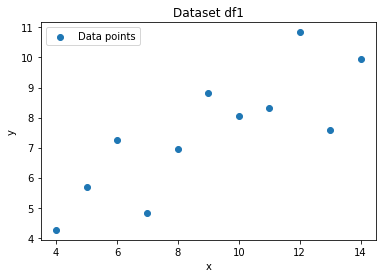

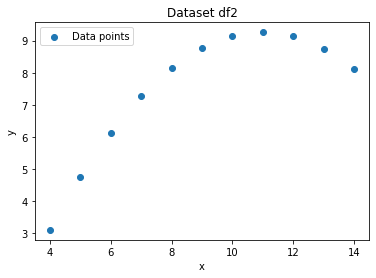

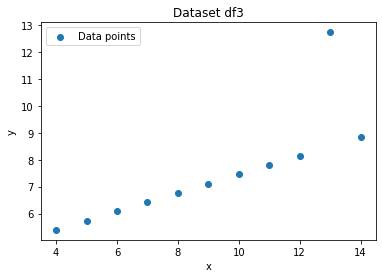

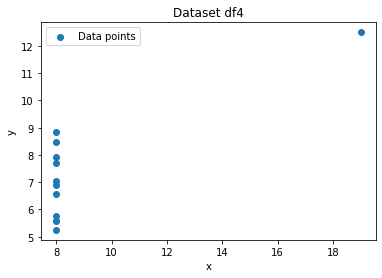

In [51]:
# visualize all four datasets
for name, (x, y) in datasets.items():
    x = np.array(x)
    y = np.array(y)
    theta_0 = results[name]['theta_0']
    theta_1 = results[name]['theta_1']
    y_pred = predict(x, theta_0, theta_1)
    
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, label='Data points')
    plt.title(f'Dataset {name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Checking the residuals will also shed light on the differences among these four datasets.

If you remember from Data 8, "the residual plot of a good regression shows no pattern".

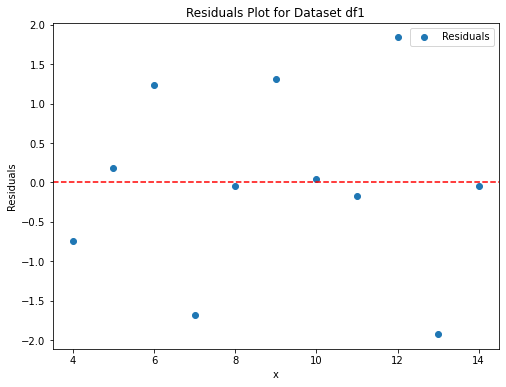

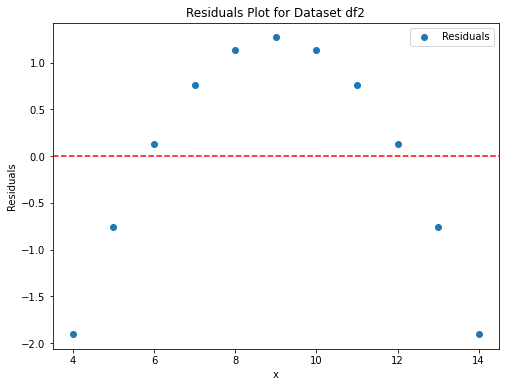

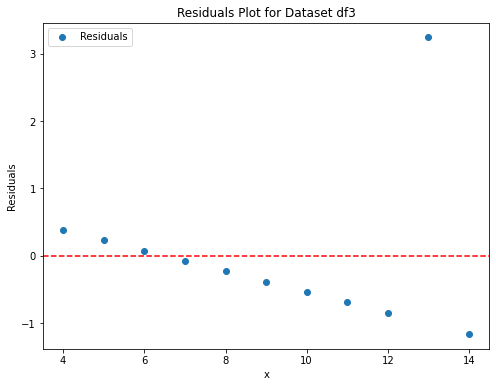

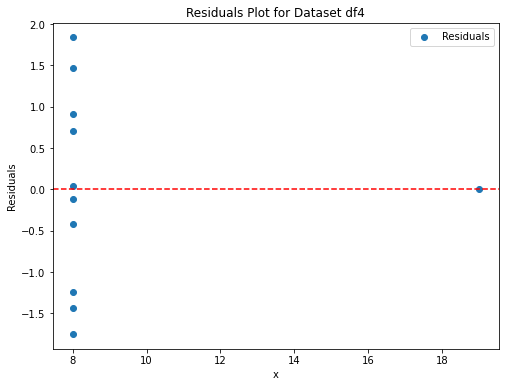

In [52]:
# plot residual with respect to x for all four Datasets
for name, (x, y) in datasets.items():
    x = np.array(x)
    y = np.array(y)
    theta_0 = results[name]['theta_0']
    theta_1 = results[name]['theta_1']
    y_pred = predict(x, theta_0, theta_1)
    residuals = y - y_pred
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x, residuals, label='Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals Plot for Dataset {name}')
    plt.xlabel('x')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

The takeaway here is that you should always visualize your datasets before fitting any models to it!